In [22]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path

def display_all(df):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000):
        display(df)
        
data_dir = Path(".")

## Data

Load data into dataframe.

In [23]:
import itertools

hate_politics_dir = data_dir

def load_data(*path_globs):
    df_all = pd.concat([
        pd.read_json(json_file, lines=True, encoding="utf-8")
        for json_file in itertools.chain(*[ hate_politics_dir.glob(path_glob) for path_glob in path_globs ])
    ], ignore_index=True)
    # take the lastest version of each publication in the dataset
    return df_all.sort_values("version").groupby("id").last().sort_values("published_at")

hate_politics = load_data("2019-12-*.jsonl", "2020-01-*.jsonl")

Coversions to make things more convenient.

In [24]:
def convert(df):
    for f in ["published_at", "first_seen_at", "last_updated_at"]:
        df[f] = pd.to_datetime(df[f])
    df["published_date"] = df.published_at.map(lambda d: d.date())
        
convert(hate_politics)

In [25]:
hate_politics.head()

,version,canonical_url,title,author,connect_from,published_at,first_seen_at,last_updated_at,producer_id,text,urls,image_urls,hashtags,keywords,tags,metadata,comments,published_date
id,,,,,,,,,,,,,,,,,,
bce8a92d-d567-4f74-83ae-19c373468293,1582886170,https://www.ptt.cc/bbs/HatePolitics/M.15751299...,[討論] 追溯期是不是助長犯罪？,oftisa,219.68.209.51,2019-12-01 00:05:05,2020-02-28 18:36:10,2020-03-29 05:11:31,5030a557-81fe-11ea-8627-f23c92e71bad,為什麼犯罪還要制訂追溯期？\n又不是過了一段時間，犯過的最就不存在了\n\n制訂20年的追溯...,[],[],[],[],[],"{'metatags': {'og:site_name': 'Ptt 批踢踢實業坊', 'o...","[{'id': 0, 'reaction': '推', 'author': 'want150...",2019-12-01
4d5f4f60-a7a1-4631-ae38-a438200d375f,1582886166,https://www.ptt.cc/bbs/HatePolitics/M.15751300...,[轉錄] 醫師詹智鈞：選前蹭熱度 選後誰來顧？,radiohead56,101.137.20.43,2019-12-01 00:08:05,2020-02-28 18:36:06,2020-03-29 05:11:29,5030a557-81fe-11ea-8627-f23c92e71bad,1.轉錄標題︰\n醫師詹智鈞：選前蹭熱度 選後誰來顧？\n2.轉錄網址：\nhttps://...,[https://tw.appledaily.com/new/realtime/201911...,[],[],[],[],"{'metatags': {'og:site_name': 'Ptt 批踢踢實業坊', 'o...","[{'id': 0, 'reaction': '噓', 'author': 'sentaif...",2019-12-01
5a74e988-fad0-4def-9425-3c2f9c7ed93e,1582886163,https://www.ptt.cc/bbs/HatePolitics/M.15751301...,Re: [討論] 韓國瑜：當選就廢除年改!! (30年約1兆4,sentaifans,116.59.110.218,2019-12-01 00:09:28,2020-02-28 18:36:03,2020-03-29 05:11:28,5030a557-81fe-11ea-8627-f23c92e71bad,※ 引述《patentstm (暖暖苗圃沒有樹)》之銘言：\n: 韓國瑜上週說撥1千億填補勞...,[],[],[],[],[],"{'metatags': {'og:site_name': 'Ptt 批踢踢實業坊', 'o...","[{'id': 0, 'reaction': '推', 'author': 'fdtu092...",2019-12-01
01160e85-670b-4103-8ccb-0291c6ddeac0,1582886159,https://www.ptt.cc/bbs/HatePolitics/M.15751302...,Re: [討論] 全台真的就剩雲林候選人會用韓國瑜照片?,pp771017,180.217.92.55,2019-12-01 00:10:22,2020-02-28 18:35:59,2020-03-29 05:11:26,5030a557-81fe-11ea-8627-f23c92e71bad,桃園中壢也有啊，而且還不少\n\n不過以那個候選人會黏韓也不意外\n\n好奇如果上次是柱選到...,[],[],[],[],[],"{'metatags': {'og:site_name': 'Ptt 批踢踢實業坊', 'o...","[{'id': 0, 'reaction': '推', 'author': 'PTTOnli...",2019-12-01
abee2892-6ed3-4b64-8277-ce2db5e135d9,1582886156,https://www.ptt.cc/bbs/HatePolitics/M.15751302...,[討論] 韓國瑜一票，民眾黨一票！,Molester5566,223.140.216.97,2019-12-01 00:10:41,2020-02-28 18:35:56,2020-03-29 05:11:24,5030a557-81fe-11ea-8627-f23c92e71bad,我覺得啦\n\n明年唯一能讓內政慘兮兮的小菸黨下台\n\n非韓總莫屬 ！\n\n所以一定要投...,[],[],[],[],[],"{'metatags': {'og:site_name': 'Ptt 批踢踢實業坊', 'o...","[{'id': 0, 'reaction': '噓', 'author': 'LiveInN...",2019-12-01


## Basics

Let's get some idea about the volume of this dataset.

In [26]:
from datetime import *

df = hate_politics

def counts_by_day(df):
    return df.groupby("published_date").size()

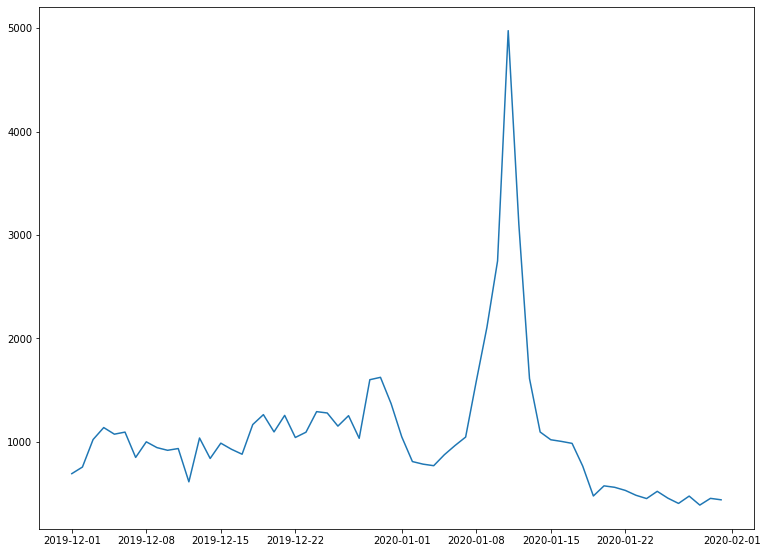

In [27]:
plt.figure(figsize=(12.8, 9.6))
plt.plot(counts_by_day(df));

In [28]:
counts_by_day(df).describe()

count      62.000000
mean     1074.403226
std       706.449225
min       386.000000
25%       756.250000
50%       991.500000
75%      1146.500000
max      4976.000000
dtype: float64

In [29]:
counts_by_day(df[df.published_date < date(2020, 1, 1)]).describe()

count      31.000000
mean     1069.838710
std       229.658311
min       611.000000
25%       929.500000
50%      1040.000000
75%      1208.000000
max      1622.000000
dtype: float64

In [30]:
counts_by_day(df[df.published_date > date(2020, 1, 13)]).describe()

count      18.000000
mean      613.444444
std       241.078514
min       386.000000
25%       451.500000
50%       500.000000
75%       715.250000
max      1093.000000
dtype: float64

In [31]:
#date_range = pd.date_range(start="2019-12-01", end="2020-01-31", freq="D")

Get to know some of the most active authors.

In [32]:
authors = df.author.value_counts()
authors.describe()

count    6265.000000
mean       10.632562
std        25.478361
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max       539.000000
Name: author, dtype: float64

Let's zoom in onto the most active quartile of authors.

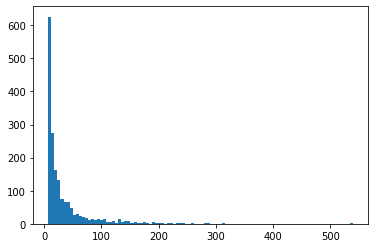

In [33]:
top_authors = authors[authors >= 7.0]
#plt.figure(figsize=(12.8, 9.6))
plt.hist(top_authors.values, bins=100);

There must be many different reasons for a user to be very active.  Let's see if we can find a group of authors who posts a consistent number of posts each day.  This is measured by the standard deviation of their number of posts everyday.

In [36]:
top_author_stats = top_authors.to_frame().apply(
    lambda author: counts_by_day(df[df.author == author.name]).describe(),
    axis=1)
display_all(top_author_stats)

,count,mean,std,min,25%,50%,75%,max
kero2377,61.0,8.836066,6.738398,2.0,5.00,7.0,10.00,38.0
songgood,62.0,5.080645,1.662493,2.0,5.00,5.0,5.00,15.0
tagso,59.0,4.830508,2.450563,1.0,4.00,5.0,5.00,20.0
nicholas0406,55.0,5.127273,2.160714,1.0,5.00,5.0,5.00,18.0
thouloveme,57.0,4.526316,1.489310,1.0,4.00,5.0,5.00,10.0
omanorboyo,56.0,4.392857,2.086132,1.0,3.00,5.0,5.00,13.0
yuxds,57.0,4.298246,1.499582,1.0,4.00,5.0,5.00,9.0
huanglove,54.0,4.425926,1.765517,1.0,3.25,5.0,5.00,10.0
geordie,62.0,3.806452,1.524002,1.0,3.00,4.0,5.00,9.0
macaron5566,54.0,4.333333,1.115922,1.0,4.00,5.0,5.00,5.0


There seems to be quite a few people who on average posts around 5 posts everyday, with a rather low deviation.  If we arbitrarily pick the thresholds of average and deviation of daily post number to be 5.0 and 1.2 respectively...

In [12]:
consistent_authors = top_author_stats[(top_author_stats["std"] < 1.2) & (top_author_stats["50%"] >= 5.0)]
consistent_authors

,count,mean,std,min,25%,50%,75%,max
songgood,62.0,4.758065,0.761480,2.0,5.00,5.0,5.0,8.0
nicholas0406,55.0,4.763636,1.154117,1.0,5.00,5.0,5.0,10.0
thouloveme,57.0,4.263158,1.077801,1.0,4.00,5.0,5.0,5.0
macaron5566,54.0,4.333333,1.115922,1.0,4.00,5.0,5.0,5.0
oftisa,44.0,4.409091,0.995763,1.0,4.00,5.0,5.0,5.0
nawabonga,17.0,4.764706,1.032558,1.0,5.00,5.0,5.0,6.0
qwe3457878,15.0,4.333333,0.975900,2.0,4.00,5.0,5.0,5.0
buoyant0828,5.0,4.600000,1.140175,3.0,4.00,5.0,5.0,6.0
erkunden,4.0,4.750000,0.500000,4.0,4.75,5.0,5.0,5.0


It could be very interesting to look into each of these authors with the help of some external databases. `macaron5566` (or "馬卡龍5566"), for example, seems to be rather famous and [runs for board master of HatePolitics this year](https://www.ptt.cc/bbs/HatePolitics/M.1583475714.A.204.html).  `nawabonga`, on the other hand, apeared in [at](https://gotv.ctitv.com.tw/2019/09/1129415.htm) [least](https://news.ltn.com.tw/news/politics/breakingnews/2802289) [three](https://www.chinatimes.com/realtimenews/20200420002172-260407?chdtv) news articles which quotes its PTT posts.  Its posting pattern on HatePolitics is also rather consistent (note that our dataset contains posts between 2019-12-01 and 2020-01-31.)

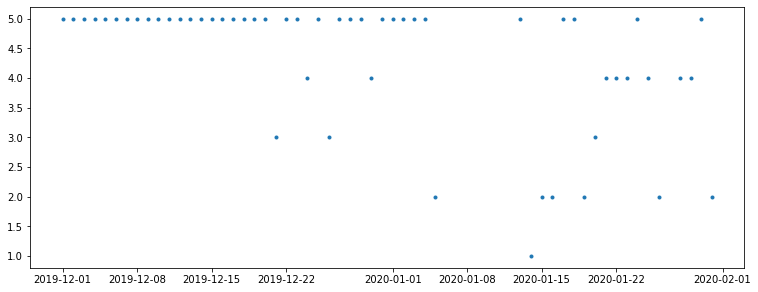

published_date
2019-12-01    5
2019-12-02    5
2019-12-03    5
2019-12-04    5
2019-12-05    5
2019-12-06    5
2019-12-07    5
2019-12-08    5
2019-12-09    5
2019-12-10    5
2019-12-11    5
2019-12-12    5
2019-12-13    5
2019-12-14    5
2019-12-15    5
2019-12-16    5
2019-12-17    5
2019-12-18    5
2019-12-19    5
2019-12-20    5
2019-12-21    3
2019-12-22    5
2019-12-23    5
2019-12-24    4
2019-12-25    5
2019-12-26    3
2019-12-27    5
2019-12-28    5
2019-12-29    5
2019-12-30    4
2019-12-31    5
2020-01-01    5
2020-01-02    5
2020-01-03    5
2020-01-04    5
2020-01-05    2
2020-01-13    5
2020-01-14    1
2020-01-15    2
2020-01-16    2
2020-01-17    5
2020-01-18    5
2020-01-19    2
2020-01-20    3
2020-01-21    4
2020-01-22    4
2020-01-23    4
2020-01-24    5
2020-01-25    4
2020-01-26    2
2020-01-28    4
2020-01-29    4
2020-01-30    5
2020-01-31    2
dtype: int64

In [13]:
plt.figure(figsize=(12.8, 4.8))
plt.plot(counts_by_day(df[df.author == "macaron5566"]), ".")
plt.show()
counts_by_day(df[df.author == "macaron5566"])

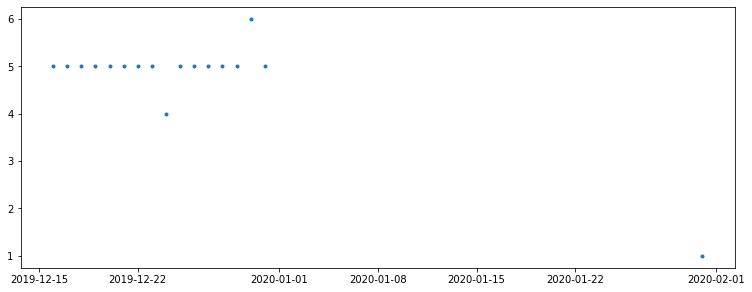

published_date
2019-12-16    5
2019-12-17    5
2019-12-18    5
2019-12-19    5
2019-12-20    5
2019-12-21    5
2019-12-22    5
2019-12-23    5
2019-12-24    4
2019-12-25    5
2019-12-26    5
2019-12-27    5
2019-12-28    5
2019-12-29    5
2019-12-30    6
2019-12-31    5
2020-01-31    1
dtype: int64

In [14]:
plt.figure(figsize=(12.8, 4.8))
plt.plot(counts_by_day(df[df.author == "nawabonga"]), ".")
plt.show()
counts_by_day(df[df.author == "nawabonga"])

In [15]:
counts_by_day(df[df.author == "erkunden"])

published_date
2019-12-18    5
2019-12-19    5
2019-12-20    4
2019-12-21    5
dtype: int64

However, it is definitely too soon to draw conclusions from these observatios.  For one thing, these observations do not hold against the data over a larger time span.  If we take the data from 2019-11 to 2020-02 into account, some of the consistencies do not hold anymore.

## i'Analyseur

[i'Analyseur](https://www.ianalyseur.org/) is a tool to look into PTT user activities.  Among other features it can show the active time of a user within a day and days of week.  Also it can do a cross-analysis of users and the IP addresses they use to connect to PTT.  Its database is [updated](https://www.ianalyseur.org/faq/) to 2018-11-08.  Now that we have a similar dataset, we can see if the same model of analysis still works for this newer dataset.

Build a pivot table from `author` and `connect_from` columns.

In [16]:
lookup_table = (
    df[["author", "connect_from"]]
    .groupby(["author", "connect_from"]).size().to_frame("count").reset_index()
    .pivot("author", "connect_from", "count")
)

In [17]:
def ianalyseur(table, username):
    """
    List the IP addresses ever used by user `username`, with all of the users that have ever used each of these IPs and the number of times they have used it.
    """
    connect_from_user = table.loc[username]
    data = {}
    for ip in connect_from_user[connect_from_user > 0].index:
        connect_from_ip = table[ip]
        for user in connect_from_ip[connect_from_ip > 0].index:
            data[(ip, user)] = int(connect_from_ip.loc[user])
    return pd.DataFrame(data.values(), index=pd.MultiIndex.from_tuples(data.keys()), columns=["count"])

See which users share IP addresses with the user "nawabonga".

In [18]:
ianalyseur(lookup_table, "nawabonga")

count
101.12.163.236 nawabonga                    15
               nawabonga (vista不到三年就玩完)      6
115.82.134.222 nawabonga                    13
               nawabonga (vista不到三年就玩完)      3
115.82.20.125  isaluku                      23
               isaluku (山本君)                 5
               nawabonga                     8
               nawabonga (vista不到三年就玩完)      2
115.82.20.78   nawabonga                    10
               nawabonga (vista不到三年就玩完)      2
118.233.86.18  isaluku                      23
               isaluku (山本君)                 2
               kapasky                      14
               kapasky (偽卡巴斯基)               3
               nawabonga                    14
               nawabonga (vista不到三年就玩完)      6
163.20.242.34  isaluku                      20
               isaluku (山本君)                 6
               kapasky                       3
               kapasky (偽卡巴斯基)               3
               nawabonga                     8
               nawabonga (vista不到三年就玩完)      1
49.214.228.220 nawabonga                     8
               nawabonga (vista不到三年就玩完)      2
49.216.17.208  nawabonga                     2
49.216.4.114   nawabonga                     3

This shows, among other things, that the dataset parser does not separate usernames from nicknames very well and needs improvements.  It also shows that user "isaluku" and "kapasky" also often use quite a few of the IP addresses used by "nawabonga".  We can find similar results [on i'Analyseur](https://www.ianalyseur.org/user/nawabonga/).

Results on some other users.

In [33]:
ianalyseur(lookup_table, "macaron5566")

count
1.167.50.184    macaron5566                    1
123.194.157.160 DICB                           1
                DICB (曾經擁有燒雲林縣垃圾。S)            1
                macaron5566                  224
                macaron5566 (ptt最真道理性的id)     55
125.224.206.216 macaron5566                    4
125.231.0.64    macaron5566                    4
                macaron5566 (ptt最真道理性的id)      1
24.18.90.133    LAPDSWAT456                    1
                LAPDSWAT456 (胖達稱霸地球)           1
                genheit                      191
                genheit (genheit)             34
                macaron5566                    1